In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
import scipy.signal

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display

#%matplotlib notebook
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 6)


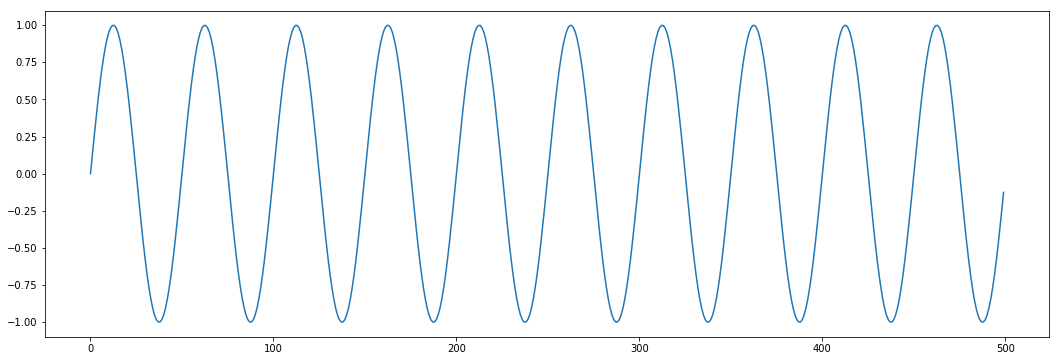

In [5]:
llen = 500
t = np.arange(llen)
a = np.sin(10*2*np.pi*t/llen)
plt.plot(t,a)

(1000,)


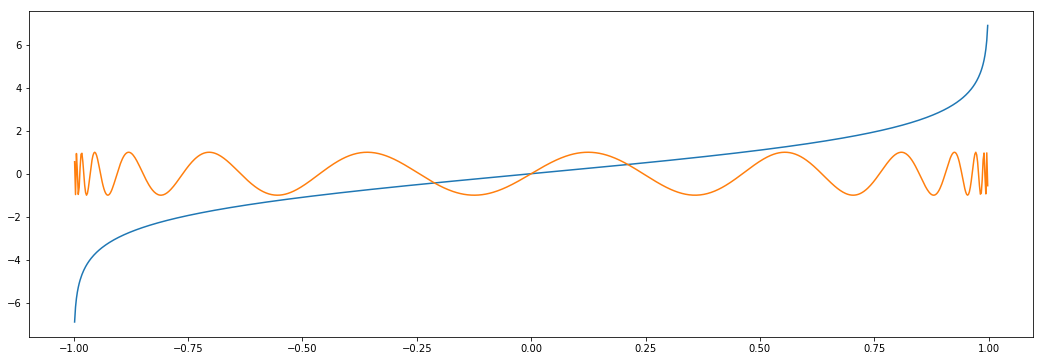

In [6]:
llen = 500
# even size so we skip zero exactly
t = np.linspace(-1., 1., 1000)
print t.shape

# hyperbolic scale of t
inside =[]
xt =[]
# skip t= -1 value so we don't log(0)
for x in t[1:-1]:
    #x = x-0.3

    y = (1+x)/(1-x)
    inside.append(y)
    xt.append(x)
ht = np.log(inside)
plt.plot(xt,ht)
a = np.sin(2*np.pi*ht)
plt.plot(xt,a)



In [7]:
@widgets.interact( lw=(-0.5, 0.5))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdmcmVxJywgbWF4PTMuMCwgbWluPS0xLjApLCBUZXh0KHZhbHVlPXUnYmx1ZScsIGRlc2PigKY=


In [8]:
@widgets.interact( lw=(-0.5, 0.5))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    llen = 500
    # hyperbolic scale of t
    inside =[]
    xt =[]
    # skip t= -1 value so we don't log(0)
    for x in t[1:-1]:
    #x = x-0.3

        y = (1+x)/(1-x)
        inside.append(y)
        xt.append(x)
    ht = np.log(inside)
    #plt.plot(xt,ht)

    #plt.plot(xt,a)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    a = np.sin(2*np.pi*ht + freq)
    plt.plot(xt,a)
   
    ax.grid(grid)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdmcmVxJywgbWF4PTMuMCwgbWluPS0xLjApLCBUZXh0KHZhbHVlPXUnYmx1ZScsIGRlc2PigKY=


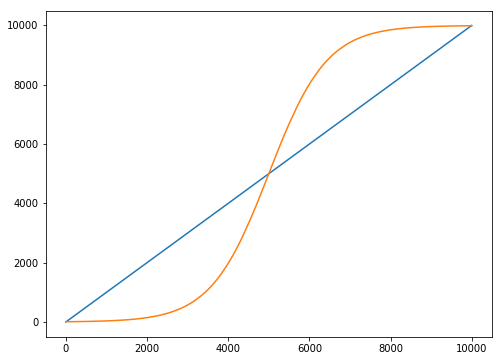

In [9]:


def hyp_map(i, n,hcent,zoom):
    '''hyperbolic map: returns int i 0<i<n  where i is hyperbolically mapped with center at fraction c 0.< c <1.
    and zoomed'''
    
    x = zoom*((float(i)/n - 0.5) + (0.5 - hcent) )
    y = (np.exp(2*x) -1)/(np.exp(2*x) +1 )
    # y is now -1<0<1

    return int((y+1)*n/2.)
    
tmax = 10000
t = np.array(range(tmax))

x  = [hyp_map(xt, tmax, 0.5, 7) for xt in t]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(t,t)
plt.plot(t,x)


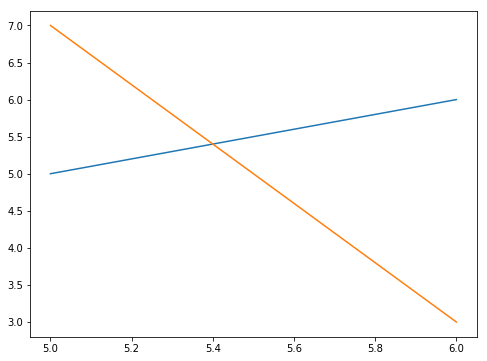

In [10]:


def pmap(x, inmin, inmax, outmin, outmax):
    # processing-like map function
    # first map to 0-1
    y = (x -inmin)/(inmax-inmin)
    return(y*(outmax-outmin) + outmin)
    
    
t = np.linspace(5., 6.0,1000)

x  = [pmap(xt, 5, 6, 7, 3) for xt in t]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(t,t)
plt.plot(t,x)


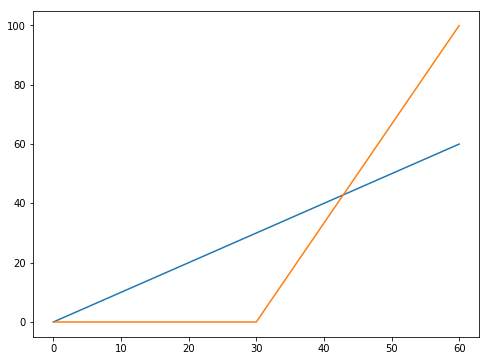

In [67]:

# inverse linear map. maps 0 <= o < n  into 0 <= i < m inverse hyperbolically

def ilin_map(i, n, m, hcent, zoom):
    '''i is output element out of n.  
       m is total number of input slots'''

    y = zoom * float(i - n/2)/float(n)
    
    # y is now symmetric around zero, recenter, scale to m, and clip
    j = m*(y+hcent)
    if j > m:
        j = m
    elif j < 0:
        j = 0
    return j

"""    
    while j >= m:
        j -= m 
    while j < 0:
        j += m
"""    

tmax = 60
t = np.array(range(tmax))
t = np.linspace(0, tmax, 255)
x  = [ilin_map(xt, tmax, 100, 0.0, 2.0) for xt in t]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(t,t)
plt.plot(t,x)


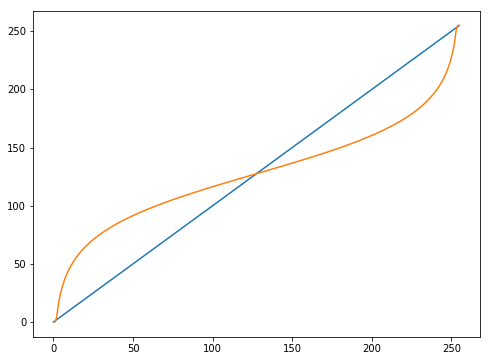

In [11]:

# inverse hyperbolic map. maps 0 <= o < n  into 0 <= i < m inverse hyperbolically

def ihyp_map(o, n, m, hcent, zoom):
    '''i is output element out of n.  
       m is total number of input slots'''
    eps = 0.001
    x = 2*(o/n)  - 1.0
    if x <= -1.0:
        x = -1.0 + eps
    elif x >= 1.0:
        x = 1.0 - eps
    
    y = 2*np.log((1 +x)/(1-x) )
    # y is now symmetric around zero, recenter, scale to m, and clip
    i = (zoom*0.5*m*y) + hcent*m 
    if i >= m:
        i = m 
    elif i < 0:
        i = 0

    return i
    
tmax = 10000
t = np.array(range(tmax))
t = np.linspace(0, 255, 255)
x  = [ihyp_map(xt, 255, 255, 0.5, 0.1) for xt in t]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(t,t)
plt.plot(t,x)


In [68]:
@widgets.interact(  hcent=(0, 1.), zoom=(0.1, 2))
def plot(freq=1., color='blue', hcent=0.5, zoom=1., grid=True):
    n = 100
    t = np.linspace(0, n, n)
    o = [ilin_map(xt, n, 60, hcent, zoom) for xt in t]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plt.plot(t,o)
    ax.grid(grid)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdmcmVxJywgbWF4PTMuMCwgbWluPS0xLjApLCBUZXh0KHZhbHVlPXUnYmx1ZScsIGRlc2PigKY=


In [14]:
@widgets.interact(  hcent=(0, 1.), zoom=(0.01, 1.0))
def plot(freq=1., color='blue', hcent=0.5, zoom=0.1, grid=True):
    n = 30
    t = np.linspace(0, n, n)
    o = [ihyp_map(xt, n, n, hcent, zoom) for xt in t]
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.plot(o,[0]*n, 'o')
    ax.grid(grid)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdmcmVxJywgbWF4PTMuMCwgbWluPS0xLjApLCBUZXh0KHZhbHVlPXUnYmx1ZScsIGRlc2PigKY=


In [15]:
@widgets.interact(  hcent=(0, 1.), zoom=(0.01, 1.0))
def plot(freq=1., color='blue', hcent=0.5, zoom=0.1, grid=True):
    n = 30
    t = np.linspace(0, n, n)
    o = [ihyp_map(xt, n, n, hcent, zoom) for xt in t]
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.plot(t, o, 'o')
    ax.grid(grid)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdmcmVxJywgbWF4PTMuMCwgbWluPS0xLjApLCBUZXh0KHZhbHVlPXUnYmx1ZScsIGRlc2PigKY=
